## Equação de Onda Acústica 2D Formulação Diferenças Finitas Explícita NSG 

__________________

$$ \nabla^2 p -\frac{1}{c²}\frac{\partial^2 p}{\partial t^2} = -\rho \ s(t)  $$

$$ \frac{\partial^2 p}{\partial t^2} = c^2\left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial z^2} \right) +c^2\rho \ s(t) \tag{1}$$

Equação (1) pode ser aproximada por diferenças finitas. Considerando quarta-ordem no espaço (x e z), segunda ordem no tempo (t). Os indices correspondentes são i, k e n respectivamente. 

$$ \frac{\partial^2 p}{\partial t^2} = \frac{p_{ik}^{n+1}-2p_{ik}^n+p_{ik}^{n-1}}{\Delta t^2}  $$

para x ou z:

$$ \frac{\partial^2 p}{\partial x^2} = \frac{-p_{i-2k}^n+16p_{i-1k}^n-30p_{ik}^n+16p_{i+1k}^n-p_{i+2k}^n}{12 \Delta x^2}  $$


Conectando das duas equações acima à (1), chegamos ao esquema de marcha abaixo:

$$ \frac{p_{ik}^{n+1}-2p_{ik}^n+p_{ik}^{n-1}}{\Delta t^2} = c^2\left(
\frac{-p_{i-2k}^n+16p_{i-1k}^n-30p_{ik}^n+16p_{i+1k}^n-p_{i+2k}^n}{12\Delta x^2} +
\frac{-p_{ik-2}^n+16p_{ik-1}^n-30p_{ik}^n+16p_{ik+1}^n-p_{ik+2}^n}{12 \Delta z^2}
 \right) +c^2\rho \ s^n $$
 
para $ \Delta x = \Delta z = \Delta s$ em um grid com velocidade $c_{ik}$ e densidade $\rho_{ik}$. Nos tempos n-1, n para calculo do tempo n+1.



$$ p_{ik}^{n+1} = \frac{\Delta t^2c_{ik}^2}{12h^2} \left( -p_{i-2k}^n+16p_{i-1k}^n+16p_{i+1k}^n-p_{i+2k}^n -p_{ik-2}^n+16p_{ik-1}^n+16p_{ik+1}^n-p_{ik+2}^n-60p_{ik}^n \right) +\Delta t^2 c_{ik}^2\rho \ s_{ik}^n +2p_{ik}^n-p_{ik}^{n-1}  $$

com $ \beta_h = \frac{\Delta t^2}{12h^2} $ e $ \rho = 1 $

$$ p_{ik}^{n+1} = \beta c_{ik}^2 \left[ -p_{i-2k}^n+16p_{i-1k}^n+16p_{i+1k}^n-p_{i+2k}^n -p_{ik-2}^n+16p_{ik-1}^n+16p_{ik+1}^n-p_{ik+2}^n-60p_{ik}^n \right] +\Delta t^2 c_{ik}^2 \ s_{ik}^n +2p_{ik}^n-p_{ik}^{n-1} \tag{2} $$

A equação (2) pode ser escrita como uma convolução notar:

$$ p_{ik}^{n+1} = \beta c_{ik}^2 p_{ik}^n  \circledast  
\begin{bmatrix} 
0 & 0 & -1 & 0 & 0\\
0 & 0 & 16 & 0 & 0\\
-1 & 16 & -60 & 16 & -1\\
0 & 0 & 16 & 0 & 0\\
0 & 0 & -1 & 0 & 0\\
\end{bmatrix}
+2p_{ik}^n-p_{ik}^{n-1} +\Delta t^2 c_{ik}^2 \ s_{ik}^n  $$



A convolução deve ser somente para região de "sobreposição" (overlap) completo  `(numpy 'valid' mode)`

Uma maneira mais elegante ainda e mais eficiente é separar em duas convoluções unidimensionais nos respectivos eixos. Notar os equivalentes  $ \beta_x = \frac{\Delta t^2}{12\Delta x^2} $ e $ \beta_z = \frac{\Delta t^2}{12\Delta z^2} $

$$ p_{ik}^{n+1} = \beta_z c_{ik}^2 p_{ik}^n  \circledast  
\begin{bmatrix} 
-1\\
16\\
-30\\
16\\
-1 \\
\end{bmatrix} 
+
\beta_x c_{ik}^2 p_{ik}^n  \circledast  [-1, 16, -30, 16, -1]   
+2p_{ik}^n-p_{ik}^{n-1} +\Delta t^2 c_{ik}^2 \ s_{ik}^n $$


Para uma fonte sísmica fase zero pode se utilizar uma Ricker com frequência central $f$:
 
 
$$ s(t) = A(1 - 2 \pi^2 f^2 t^2)exp(-\pi^2 f^2 t^2) \tag{3} $$

### Considerações para implementação:

Para garantir um espectro limitado com frequência máxima $f_{cut}$ (99.7 da amplitude) a $f$ central pode ser definida como:

$$        f = \frac{2f_{cut}}{3\sqrt{\pi}} $$

Para evitar criação de descontinuídades no tempo $t_0$ (e séria dispersão númerica!) é necessário aplicar a fonte $s(t)$ como uma fonte causal. Para isso a partir da frequência central $f$ aplica-se um delay em $t = t - t_d  $ baseado no perído da frequência dominante. 


$$ t_d = \frac{1}{f} $$

Leandro era $ t_d = \frac{2\sqrt{\pi}}{f} $

Para evitar dispersão numérica espacial é necessário que o grid seja capaz de amostrar o menor comprimento de onda sem falseamento. O menor comprimento de onda é dado por:  

$$ v = \lambda f \implies   \lambda = \frac{v}{f}  \implies \lambda_{min} = \frac{min ( c_{ik})}{max(f)} \implies \lambda_{min} = \frac{min ( c_{ik})}{f_{cut}} \tag{4} $$

Considerando um espaçamento entre os pontos do grid de $\Delta s$.
Tem-se que o maior comprimento de onda espacial amostrado sem falseamento é definido por Nyquest:    
    
$$ K_{Nyquest} = \frac{1}{2\Delta s} $$

Assim no grid:

$$ K_{\lambda_{min}} \lt K_{Nyquest} \implies  \frac{1}{\lambda_{min}}  \lt \frac{1}{2\Delta s}  $$

$$ \Delta s  \lt \frac{1}{2} \lambda_{min} $$ 


**From Alford 1974**  
Na prática é necessário valores bem menores de $\Delta s$ ??? (R.M, Alford. 1974), define-se o número mínimo de pontos para representar o menor comprimento de onda . Nota para discutir Alford. não usa $f_{cut}$ usa uma frequẽncia que ainda está bem longe da $f_{cut}$ de sua fonte !!? 

1. Segunda ordem espacial 
$$ \Delta s \lt \frac{\lambda_{min}}{10} $$
2. Quarta ordem espacial 
$$ \Delta s \lt \frac{\lambda_{min}}{5} \tag{5}$$

Finalmente para garantir que o erro entre os passos em tempo não cresça exponencial a analise de Von Newman define para um esquema de **4 ordem no espaço e segunda ordem no tempo** (Chen, Jing-Bo 2011):

$$
     \Delta t \leq \frac{2 \Delta s}{ V \sqrt{\sum_{a=-N}^{N} (|w_a^1| + |w_a^2|)}} \leq \frac{ \Delta s \sqrt{3}}{ c_{max} \sqrt{8}} \tag{6}
$$

Onde $w_a$ são os pesos das diferenças finitas.

Uma nota final Alford mostra que $\Delta t$ quanto mais próximo do limite de estabilidade numérica menor é o erro da solução (dispersão numérica).

Referencias:  
1. Alford R.M., Kelly K.R., Boore D.M. (1974) Accuracy of
finite-difference modeling of the acoustic wave equation
Geophysics, 39 (6), P. 834-842  
2. Chen, Jing-Bo (2011) A stability formula for Lax-Wendroff methods
with fourth-order in time and general-order in space for
the scalar wave equation Geophysics, v. 76, p. T37-T42
Convergence  

Leandro critério de tempo $ \Delta t \lt \frac{ \Delta s }{  4 c_{max}} $

### Condição de Absorção : interfaces laterais e inferior

1. Equação one way 1D scalar

Essa equação de propagação de onda não permite reflexões. Ela modela uma onda que proga-se em um sentido único: somente para frente ou somente para trás. Assumindo o eixo x positivo para direita, o sinal negativo na equação abaixo ela proga-se para esquerda.

$$ \frac{dp}{dx} \pm \frac{1}{c} \frac{dp}{d t} = 0 \tag{7} $$

Discretizando a equação por diferenças finitas (primeira ordem), assumindo i como indice do eixo x chega-se em:

$$ \frac{d p}{d t} = \frac{p_{i}^{n+1}-p_{i}^{n}}{\Delta t}  $$

$$ \frac{d p}{d x} = \frac{p_{i+1}^{n}-p_{i}^{n}}{\Delta x}  $$

Conectando as duas equações 

$$ \frac{p_{i+1}^{n}-p_{i}^{n}}{\Delta x} + \frac{1}{c}\frac{p_{i}^{n+1}-p_{i}^{n}}{\Delta t} =0 $$

Onda para a direita:

$$ p_{i}^{n} - \frac{c\Delta t}{\Delta x} \left(p_{i+1}^{n}-p_{i}^{n}\right) =  p_{i}^{n+1} $$


Onda para a esquerda:

$$ -p_{i}^{n} + \frac{c\Delta t}{\Delta x} \left(p_{i+1}^{n}-p_{i}^{n}\right) =  p_{i}^{n+1} $$


In [48]:
% matplotlib inline

In [49]:
from matplotlib import pyplot as plt
import matplotlib.animation
import matplotlib
import numpy as np

## Implementação

In [50]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [51]:
%%cython

cimport cython
import numpy as np
from cython.parallel cimport prange

@cython.boundscheck(False)
@cython.wraparound(False)
def stepScalar(double[:,::1] u_tp1, double[:,::1] u_t, double[:,::1] u_tm1, 
                int x1, int x2, int z1, int z2, double dt, double ds, double[:,::1] vel):
    """
    Perform a single time step in the Finite Difference solution for scalar
    waves 4th order in space
    """
    cdef int i, j
    cdef double cds = (dt/ds)**2

    with nogil:
        for i in prange(z1, z2):
            for j in xrange(x1, x2):
                u_tp1[i,j] = (2.*u_t[i,j] - u_tm1[i,j]
                    + (vel[i,j]**2)*(
                        cds*(-u_t[i,j + 2] + 16.*u_t[i,j + 1] - 30.*u_t[i,j] +
                        16.*u_t[i,j - 1] - u_t[i,j - 2])/12. +
                        cds*(-u_t[i + 2,j] + 16.*u_t[i + 1,j] - 30.*u_t[i,j] +
                        16.*u_t[i - 1,j] - u_t[i - 2,j])/12.))    

In [99]:
%%cython

cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
def nonreflexive(double[:,::1] pt1, double[:,::1] pt, double[:,::1] c, 
                 double dt, double dx, double dz):
    nz = c.shape[1]
    nx = c.shape[2]
    
    cdef int k, i
    # Aplica à esquerda onda que vai para esquerda somente    
    for k in range(nz): # a linha vai para baixo
        for i in range(2):
            #pt1[k, i] = -pt[k, i] + (c[k, i]*dt/dx)*(pt[k, i]-pt[k, i+1])
            pt1[k, i] = pt[k, i] - (c[k, i]*dt/dx)*(pt[k, i]-pt[k, i])
        
#     # Damping on the right
#     for i in range(nz):
#         for j in range(nx - pad, nx):
#             array[i,j] *= exp(-((decay*(j - nx + pad))**2))
#     # Damping on the bottom
#     for i in range(nz - pad, nz):
#         for j in range(nx):
#             array[i,j] *= exp(-((decay*(i - nz + pad))**2))
    
    


In [127]:
%%time

from scipy.signal import fftconvolve

def ricker(t, td, f):
    """amplitude unitária"""
    t = (t - td)
    aux = (1 - 2*(np.pi*f*t)**2)
    return aux*np.exp(-(np.pi*f*t)**2)

def params(fcut, c):
    """
    A partir da frequencia máxima na fonte `fcut` e do 
    campo de velocidades `c` calcula:
    ds, f central, t delay, dt time step
    """    
    # fcut máxima frequência na fonte
    f = 2*fcut/(3*np.sqrt(np.pi)) # f central
    td = 1./f # time delay    
    lmin = np.min(c)/fcut # lambda min
    ds = lmin/4. # espaçamento grid evitar alias espacial "na lata"
    dt = (1-1e-4)*ds*np.sqrt(3)/(np.sqrt(8)*np.max(c))  # "quaaase" no limite (menor erro)
    return ds, f, td, dt

N = 100 # grid dimensao
N += 2*2 # segunda ordem no espaço stencial requer +2+2 pontos cada dimensao
npad = 10

c = np.ones((N, N), dtype=np.float)*1500. # àgua
# campos de pressao em n e n+1 ou n-1
p = np.zeros((2, N, N), dtype=np.float, order='C') # n e n+1 ou n-1

# parametros da simulacao fonte de 20 Hz no máxxximoo...
ds, f, td, dt = params(30., c)
# numero de iteracoes a partir de duracao da simulacao
duracao = .950 # segundo
nt = int(duracao/dt)

# posicao fonte
si, sk = 50, 10
kernel = np.array([[ 0,  0,  -1,  0,  0],
                   [ 0,  0,  16,  0,  0], 
                   [-1, 16, -60, 16, -1],
                   [ 0,  0,  16,  0,  0],
                   [ 0,  0,  -1,  0,  0]]) # diferenciador convolucional  

# simplicar contas loop
beta = dt/ds

snaps = []
for i in range(nt):
    # para evitar um painel a mais : pilha de paineis 
    t, tm1 = i%2, (i+1)%2
    tp1 = tm1  
    
    #nonreflexive(p[tp1], p[t], c, dt, ds, ds)
    p[tp1, 2:-2, 2:-2] = ((1./12.)*(beta*c[2:-2,2:-2])**2*fftconvolve(kernel, p[t], mode='valid')
                          +2*p[t, 2:-2, 2:-2] - p[tm1, 2:-2, 2:-2])     
#     stepScalar(p[tp1], p[t], p[tm1], 2, N-2, 2, N-2, dt, ds, c)
    p[tp1, 2+sk, 2+si] -= ((c[2+sk, 2+si]*dt)**2)*ricker(i*dt, td, f)

    
    if i%1==0:
        snaps.append(p[t].copy())   
        
        
print('Ds: ', ds, 'f. central :', f, 'delay : ', td, 'dt: ',  dt, ' nt: ', nt)

Ds:  12.5 f. central : 11.283791670955125 delay :  0.0886226925452758 dt:  0.005102593320435207  nt:  186
CPU times: user 540 ms, sys: 16 ms, total: 556 ms
Wall time: 140 ms


In [128]:
import matplotlib
import matplotlib.animation

snaps = np.array(snaps)
pmin = np.percentile(snaps, [1])
ext = [0, N*ds, N*ds, 0]

fig = plt.figure(figsize=(7,7))
im = plt.imshow(snaps[0,:,:], cmap='gray_r', interpolation='nearest', vmin=-pmin, vmax=pmin, extent=ext)
plt.colorbar(im,  shrink=0.7, pad = 0.07, label=u'amplitude')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
title = plt.title(u'Campo de Pressão')
#sns.despine()
plt.tight_layout()
plt.close()

def animate(i):
    im.set_data(snaps[i, :,:])
    #title.set_text(u'Temperatura da chapa - %.2f' % (snaps[i] * dt))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=snaps.shape[0])

from IPython.display import HTML
HTML(ani.to_jshtml())

In [87]:
p.shape

(2, 104, 104)

### Implementação Equação One Way 1D 

$$ \frac{p_{i+1}^{n}-p_{i}^{n}}{\Delta x} + \frac{1}{c}\frac{p_{i}^{n+1}-p_{i}^{n}}{\Delta t} =0 $$

Propagando-se para a direita:


$$ p_{i}^{n} - \frac{c\Delta t}{\Delta x} \left(p_{i+1}^{n}-p_{i}^{n}\right) =  p_{i}^{n+1} $$


Onda para a esquerda:

$$ -p_{i}^{n} + \frac{c\Delta t}{\Delta x} \left(p_{i-1}^{n}-p_{i}^{n}\right) =  p_{i}^{n+1} $$

Perguntas, qual a condição de estabilidade disso?

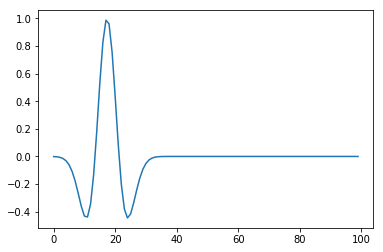

In [126]:
plt.plot(ricker(np.arange(100)*dt, td, f))

In [124]:
# somente para direita com np.diff para a esquerda não sei fazer com np.diff
pone = np.zeros(N)
nextt = np.zeros(N)
cs = np.ones(N)
cs[:50] = 1500
cs[-50:] = 2300
snaps = []
for i in range(100):
    pone[50] -= ricker(i*dt, td, f)*1500.*dt  
    #pone[1:] -= cs[1:]*np.diff(pone)*dt/ds
    for j in range(1,N):
        nextt[j] = pone[j]-(cs[j]*dt/ds)*(pone[j]-pone[j-1])    
    pone = nextt.copy()        
    snaps.append(pone.copy())
    
snaps = np.array(snaps)

In [125]:
ymin, ymax = np.min(snaps), np.max(snaps)
fig = plt.figure()
sub = fig.add_subplot(111)
ax = sub.plot(np.arange(N)*ds, snaps[0])
sub.set_ylim(ymin, ymax)

plt.xlabel('x')
plt.ylabel('amplitude ')
title = plt.title(u'Equação One Way')
plt.tight_layout()
plt.close()

def animate(i):
    ax[0].set_ydata(snaps[i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=snaps.shape[0])

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
def _timestep(self, u, tm1, t, tp1, iteration):
    """
    Performs a single step on time (finite differences solution)
    (only called by run)
    Parameters:
    * u: 3D array
        two 2D simulation panels shape (2, nz+pad, nx+2pad)
    * tm1: int
        panel index (t minus 1)
        (to avoid copying between 2D arrays)
    * t: int
        panel index (t)
        (to avoid copying between 2D arrays)
    * tp1: int
        panel index (t plus 1)
        (to avoid copying between 2D arrays)
    * iteration: int
        iteration time step of this simulation
    """

    nz, nx = self.shape
    # due dump regions
    nz += self.padding
    nx += self.padding*2
    # apply reynolds 1D for 4th order space 2nd time
    _nonreflexive_scalar_boundary_conditions(
        u[tp1], u[t], u[tm1], self.velocity, self.dt, self.dx,
        self.dz, nx, nz)
    # Damp the regions in the padding to make waves go to infinity
    # apply dumping in everything to be consistent with
    # nonreflexive boundary conditions
    _apply_damping(u[tm1], nx, nz, self.padding, self.taper)
    _apply_damping(u[t], nx, nz, self.padding, self.taper)
    # finally make the step

    for pos, src in self.sources:
        j, i = pos
        u[tp1, i, j + self.padding] += src(iteration*self.dt)

In [ ]:
%cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def _nonreflexive_scalar_boundary_conditions(
    double[:,::1] u_tp1 not None,
    double[:,::1] u_t not None,
    double[:,::1] u_tm1 not None,
    double[:,::1] vel not None,
    double dt, double dx, double dz,
    unsigned int nx, unsigned int nz):
    """
    Apply the boundary conditions: free-surface at top, transparent in the borders
    4th order (+2-2) indexes
    Uses Reynolds, A. C. - Boundary conditions for numerical solution of wave propagation problems
    Geophysics p 1099-1110 - 1978
    The finite difference approximation used by Reynolds for the transparent boundary condition is of first
    order, though the scalar schema of propagation is of fourth order in space
    """
    cdef unsigned int i

    # To make reynolds (2nd order space) work for 4th order in space
    # With just 2 panels (t and tm1) where tm1 becomes tp1
    # We apply 1D reynolds at -2/-1 and +2/+1 respectively and it works
    # it just works like bellow. I don´t know why though.
    # The the last valid cells are at x [2, nx-3] z [0, nz-3].
    # we always apply outside like instructed by Reynolds.
    # Also you must use absorbing boundary before step_scalar in the loop

    for i in range(nz):
        # left
        for p in range(2):
                u_tp1[i, p] = ( u_t[i, p] + u_t[i, p+1] - u_tm1[i,p+1] +
                (vel[i, p]*dt/dx)*(u_t[i, p+1] - u_t[i, p] - u_tm1[i, p+2] + u_tm1[i, p+1])
                )
        #right
        for p in range(2):
            p = 1-p            
            u_tp1[i, nx-2+p] = ( u_t[i, nx-2+p] + u_t[i, nx-3+p] - u_tm1[i, nx-3+p] -
                (vel[i, nx-2+p]*dt/dx)*(u_t[i, nx-2+p] - u_t[i, nx-3+p] - u_tm1[i, nx-3+p] + u_tm1[i, nx-4+p])
                )
    # Down
    for i in range(nx):
        for p in range(2):
            p = 1-p
            u_tp1[nz-2+p, i] = ( u_t[nz-2+p, i] + u_t[nz-3+p, i] - u_tm1[nz-3+p, i] -
                    (vel[nz-2+p, i]*dt/dz)*(u_t[nz-2+p, i] - u_t[nz-3+p, i] - u_tm1[nz-3+p, i] + u_tm1[nz-4+p, i])
                    )

In [ ]:
%%cython

cimport cython
from libc.math cimport exp, sqrt

@cython.boundscheck(False)
@cython.wraparound(False)
def _apply_damping(double[:,::1] array not None,
    unsigned int nx, unsigned int nz, unsigned int pad, double decay):
    """
    Apply a decay factor to the values of the array in the padding region.
    """
    cdef:
        unsigned int i, j
    # Damping on the left
    for i in range(nz):
        for j in range(pad):
            array[i,j] *= exp(-((decay*(pad - j))**2))
    # Damping on the right
    for i in range(nz):
        for j in range(nx - pad, nx):
            array[i,j] *= exp(-((decay*(j - nx + pad))**2))
    # Damping on the bottom
    for i in range(nz - pad, nz):
        for j in range(nx):
            array[i,j] *= exp(-((decay*(i - nz + pad))**2))